In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.linear_model import LinearRegression, ElasticNet
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.decomposition import PCA
from sklearn.feature_selection import mutual_info_regression
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm #TRY THIS NEXT FOR REGRESSION.

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
sns.set_theme(style='whitegrid')

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


/kaggle/input/superstore-dataset-final/Sample - Superstore.csv


## Importing & Understanding Data, Variables

In [2]:
PATH = "/kaggle/input/superstore-dataset-final/Sample - Superstore.csv"
raw_df = pd.read_csv(PATH, encoding='windows-1252')
df = raw_df.copy()

pd.set_option('display.max_rows', 999)
pd.set_option('display.max_columns', 999)


df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [3]:
df.tail()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
9989,9990,CA-2014-110422,1/21/2014,1/23/2014,Second Class,TB-21400,Tom Boeckenhauer,Consumer,United States,Miami,Florida,33180,South,FUR-FU-10001889,Furniture,Furnishings,Ultra Door Pull Handle,25.248,3,0.2,4.1028
9990,9991,CA-2017-121258,2/26/2017,3/3/2017,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,California,92627,West,FUR-FU-10000747,Furniture,Furnishings,Tenex B1-RE Series Chair Mats for Low Pile Car...,91.960,2,0.0,15.6332
9991,9992,CA-2017-121258,2/26/2017,3/3/2017,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,California,92627,West,TEC-PH-10003645,Technology,Phones,Aastra 57i VoIP phone,258.576,2,0.2,19.3932
9992,9993,CA-2017-121258,2/26/2017,3/3/2017,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,California,92627,West,OFF-PA-10004041,Office Supplies,Paper,"It's Hot Message Books with Stickers, 2 3/4"" x 5""",29.600,4,0.0,13.3200
9993,9994,CA-2017-119914,5/4/2017,5/9/2017,Second Class,CC-12220,Chris Cortes,Consumer,United States,Westminster,California,92683,West,OFF-AP-10002684,Office Supplies,Appliances,"Acco 7-Outlet Masterpiece Power Center, Wihtou...",243.160,2,0.0,72.9480


In [4]:
df.shape

(9994, 21)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   float64
 18  Quantity

In [6]:
df.isnull().sum()

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64

In [7]:
print(np.unique(df['Category'], return_counts=True))
print(np.unique(df['Sub-Category'], return_counts=True))

(array(['Furniture', 'Office Supplies', 'Technology'], dtype=object), array([2121, 6026, 1847]))
(array(['Accessories', 'Appliances', 'Art', 'Binders', 'Bookcases',
       'Chairs', 'Copiers', 'Envelopes', 'Fasteners', 'Furnishings',
       'Labels', 'Machines', 'Paper', 'Phones', 'Storage', 'Supplies',
       'Tables'], dtype=object), array([ 775,  466,  796, 1523,  228,  617,   68,  254,  217,  957,  364,
        115, 1370,  889,  846,  190,  319]))


In [8]:
print(np.unique(df['Product Name'], return_counts=True))

(array(['"While you Were Out" Message Book, One Form per Page',
       '#10 Gummed Flap White Envelopes, 100/Box',
       '#10 Self-Seal White Envelopes', ..., 'iOttie XL Car Mount',
       'invisibleSHIELD by ZAGG Smudge-Free Screen Protector',
       'netTALK DUO VoIP Telephone Service'], dtype=object), array([3, 4, 4, ..., 2, 7, 7]))


In [9]:
print(df['Product Name'].nunique())

1850


In [10]:
print(df['Product Name'].value_counts())

Staple envelope                                                                        48
Staples                                                                                46
Easy-staple paper                                                                      46
Avery Non-Stick Binders                                                                20
Staples in misc. colors                                                                19
                                                                                       ..
Boston 1900 Electric Pencil Sharpener                                                   1
RCA ViSYS 25423RE1 Corded phone                                                         1
Canon Color ImageCLASS MF8580Cdw Wireless Laser All-In-One Printer, Copier, Scanner     1
Newell 342                                                                              1
Eldon Jumbo ProFile Portable File Boxes Graphite/Black                                  1
Name: Prod

The most of any one product is 48 (Staple envelope), so it doesn't make much sense to drill down as far as product name. Most likely  sub-category will be enough.

In [11]:
df.describe()

,Row ID,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,4997.500000,55190.379428,229.858001,3.789574,0.156203,28.656896
std,2885.163629,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1.000000,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,2499.250000,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,4997.500000,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,7495.750000,90008.000000,209.940000,5.000000,0.200000,29.364000
max,9994.000000,99301.000000,22638.480000,14.000000,0.800000,8399.976000


It's staggering that the median profit value is just 8.66, and then the max is 8399.97!

Since the date columns are currently of the string class, we should change them to datetime columns in case we analyze data over time.

In [12]:
print(type(df['Ship Date'].iloc[0]))
print(type(df['Order Date'].iloc[0]))

<class 'str'>
<class 'str'>


In [13]:
df['Ship Date'] = pd.to_datetime(df['Ship Date'])
df['Order Date'] = pd.to_datetime(df['Order Date'])

print(type(df['Ship Date'].iloc[0]))
print(type(df['Order Date'].iloc[0]))

<class 'pandas._libs.tslibs.timestamps.Timestamp'>
<class 'pandas._libs.tslibs.timestamps.Timestamp'>


In [14]:
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


The dataset is already very clean. Unless anything else went unnoticed, we can move on to our data analysis.

## Data Analysis

We have plenty of variables to explore for our analysis. We already even have customer segments. An Analysis starts by asking the data questions and seeing what we can dig out.

In [15]:
np.unique(df['Segment'], return_counts=True)

(array(['Consumer', 'Corporate', 'Home Office'], dtype=object),
 array([5191, 3020, 1783]))

Let's start with making a chart depicting the sales grouped by state? In essence our question is:

<b>What is the total sales for each state (colored by customer segment)?</b>

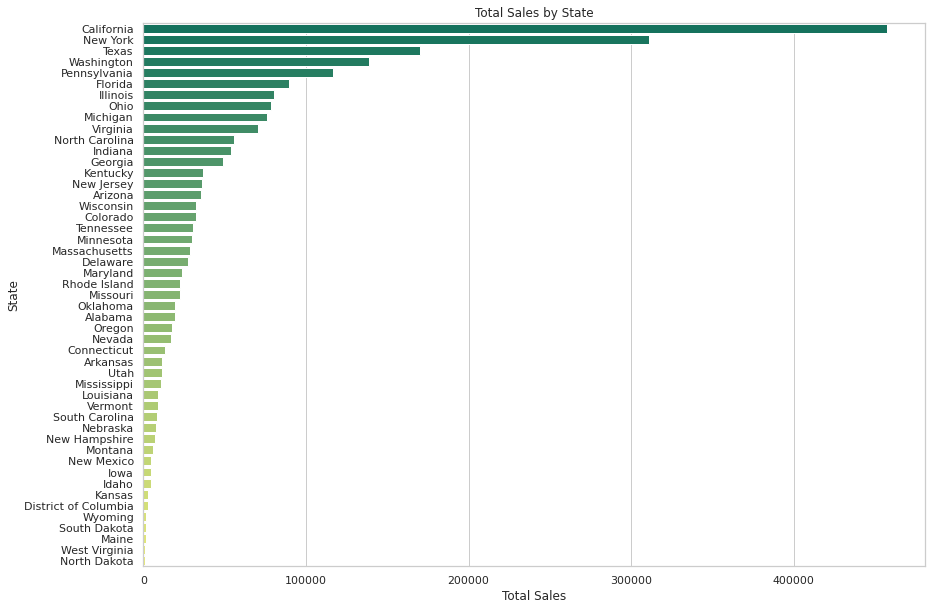

In [16]:
figure = plt.figure(figsize=(14,10))

grouped_df = df.groupby('State').sum()[['Sales']].reset_index().sort_values(by='Sales', ascending=False)
g = sns.barplot(x='Sales', y='State', data=grouped_df, palette='summer')
g.set_title('Total Sales by State')
g.set_xlabel('Total Sales')
plt.show(g)

Unsurprisingly, most of the sales are coming from the heavily populated states like California, New York, and Texas.

<b>How about total profits per state?</b>

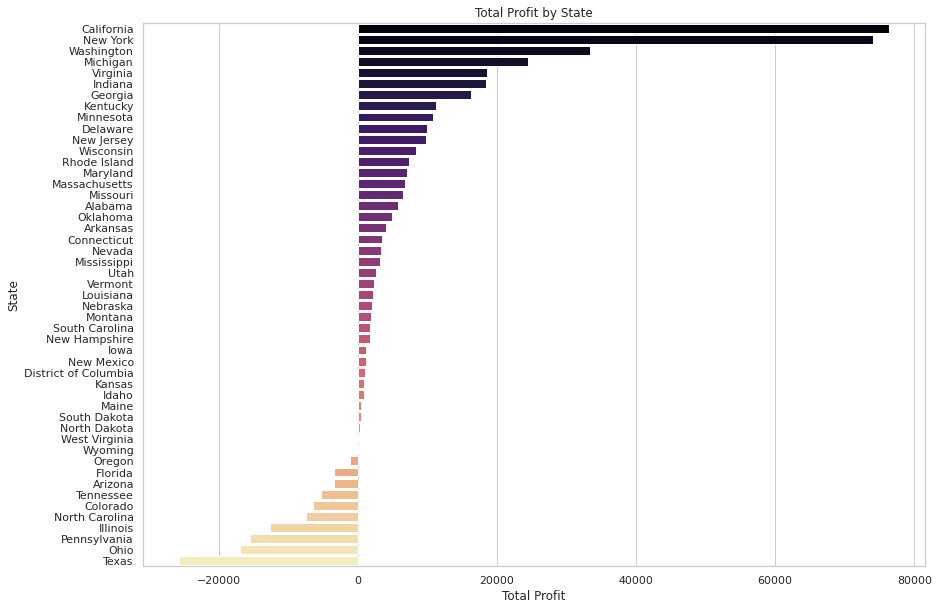

In [17]:
figure = plt.figure(figsize=(14,10))

grouped_df = df.groupby('State').sum()[['Profit']].reset_index().sort_values(by='Profit', ascending=False)
g = sns.barplot(x='Profit', y='State', data=grouped_df, palette='magma')
g.set_title('Total Profit by State')
g.set_xlabel('Total Profit')
plt.show(g)

Now this may change things. Some of the states on the higher end of sales have reocrded negative net profits. We'll keep this in mind as we go.

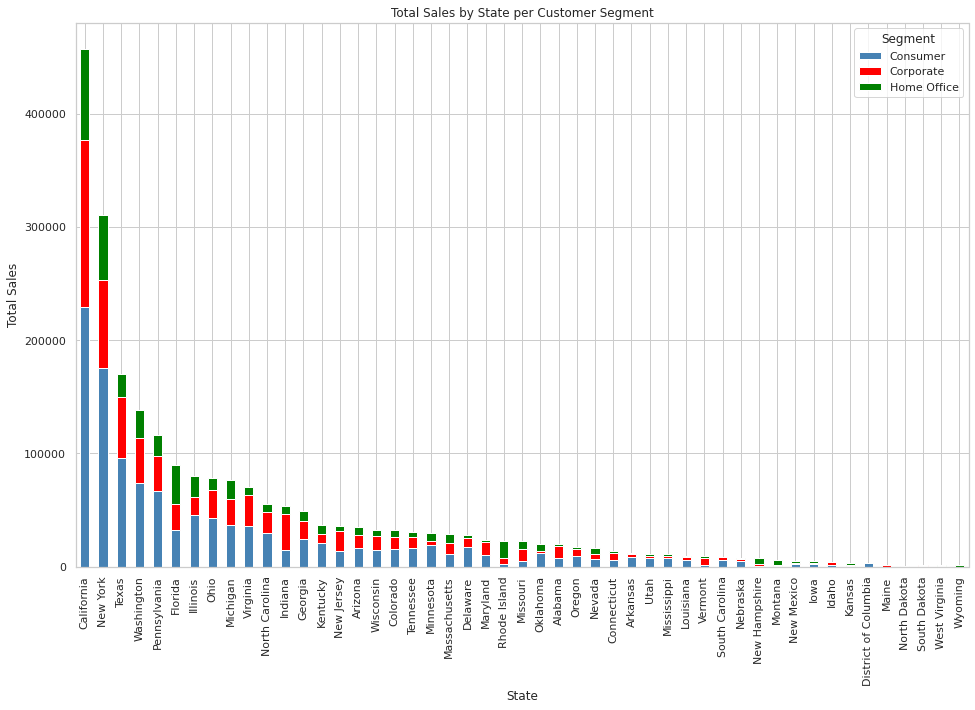

In [18]:
grouped_df = df.groupby(['State', 'Segment']).agg({'Sales':'sum'}).reset_index()
grouped_df.head()
grouped_df = grouped_df.pivot(index='State', columns='Segment', values='Sales').reset_index()
grouped_df['Total'] = grouped_df['Consumer'] + grouped_df['Corporate'] + grouped_df['Home Office']
grouped_df = grouped_df.sort_values(by='Total', ascending=False)
grouped_df.drop(columns='Total', inplace=True)

grouped_df.head()

grouped_df.set_index('State').plot(kind='bar', stacked=True, color=['steelblue', 'red', 'green'], figsize=(16,10))
plt.title('Total Sales by State per Customer Segment')
plt.ylabel('Total Sales')
plt.show()


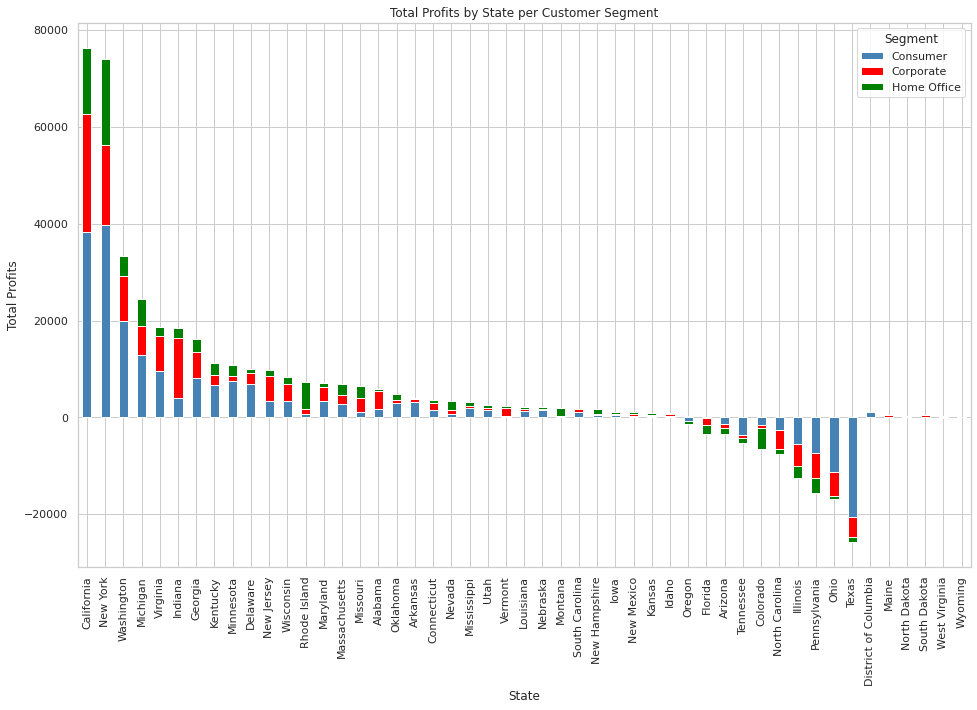

In [19]:
grouped_df = df.groupby(['State', 'Segment']).agg({'Profit':'sum'}).reset_index()
grouped_df.head()
grouped_df = grouped_df.pivot(index='State', columns='Segment', values='Profit').reset_index()
grouped_df['Total'] = grouped_df['Consumer'] + grouped_df['Corporate'] + grouped_df['Home Office']
grouped_df = grouped_df.sort_values(by='Total', ascending=False)
grouped_df.drop(columns='Total', inplace=True)

grouped_df.head()

grouped_df.set_index('State').plot(kind='bar', stacked=True, color=['steelblue', 'red', 'green'], figsize=(16,10))
plt.title('Total Profits by State per Customer Segment')
plt.ylabel('Total Profits')
plt.show()

In [20]:
top10_p_states = ['California', 'New York', 'Washington', 'Michigan', 'Virginia', 'Indiana', 'Georgia', 'Kentucky', 'Minnesota', 'Delaware']
top10p_df = df[df['State'].isin(top10_p_states)]
top10p_df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96,2,0.0,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.94,3,0.0,219.5820
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.62,2,0.0,6.8714
5,6,CA-2014-115812,2014-06-09,2014-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,California,90032,West,FUR-FU-10001487,Furniture,Furnishings,Eldon Expressions Wood and Plastic Desk Access...,48.86,7,0.0,14.1694
6,7,CA-2014-115812,2014-06-09,2014-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,California,90032,West,OFF-AR-10002833,Office Supplies,Art,Newell 322,7.28,4,0.0,1.9656


Primarily the consumer segment makes up the majority of each state regardless if their net profits were positive or negative.

Now let's look at a similar graph and add detail for each product category.

<b>What are the total Sales for each State per Product Category?</b>

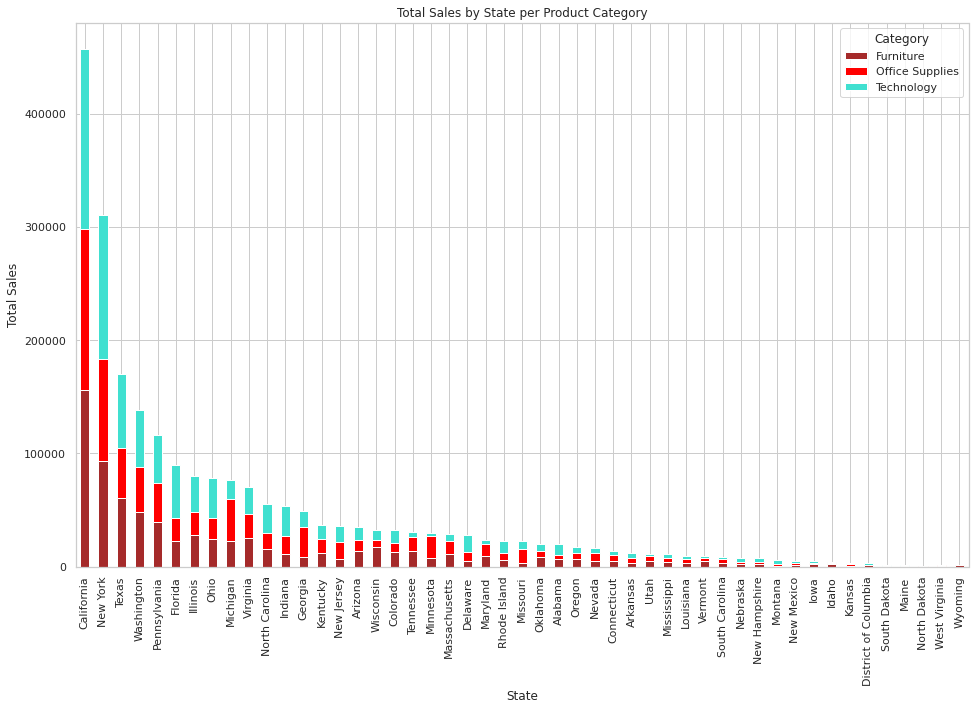

In [21]:
grouped_df = df.groupby(['State', 'Category']).agg({'Sales':'sum'}).reset_index()
grouped_df.head()
grouped_df = grouped_df.pivot(index='State', columns='Category', values='Sales').reset_index()
grouped_df['Total'] = grouped_df['Furniture'] + grouped_df['Office Supplies'] + grouped_df['Technology']
grouped_df = grouped_df.sort_values(by='Total', ascending=False)
grouped_df.drop(columns='Total', inplace=True)

grouped_df.head()

grouped_df.set_index('State').plot(kind='bar', stacked=True, color=['brown', 'red', 'turquoise'], figsize=(16,10))
plt.title('Total Sales by State per Product Category')
plt.ylabel('Total Sales')
plt.show()

Among the top states and down the list, the distribution of product category sales is fairly even.

We saw from printing the unique counts of Segment that the majority of records come from consumer customer segments. In this graph, we can see that ratio amongst each state is also consistent.

Sometimes, getting answers to questions can lead to more granular questions. Since we have the top 10-15 or so states contributing to the majority of the sales, what percentage of sales in total are coming from those states?

In [22]:
top10_states = grouped_df['State'].tolist()[:10]
top15_states = grouped_df['State'].tolist()[:15]
top20_states = grouped_df['State'].tolist()[:20]

print('Percentage of top 10 state sales:', round(df[df['State'].isin(top10_states)].count()[0] / df.count()[0], 4)*100,'%')
print('Percentage of top 15 state sales:',round(df[df['State'].isin(top15_states)].count()[0] / df.count()[0], 4)*100,'%')
print('Percentage of top 20 state sales:',round(df[df['State'].isin(top20_states)].count()[0] / df.count()[0], 4)*100,'%')

Percentage of top 10 state sales: 70.34 %
Percentage of top 15 state sales: 78.86 %
Percentage of top 20 state sales: 86.74 %


Almost 80% of the sales are coming from 15 states! Let's drill-down to those 15 states and see if we can find out what products are popular. Another quick note is that the states are primarily east or midwest states. The exceptions are California, Texas, and Washington State.

In [23]:
top15_states

['California',
 'New York',
 'Texas',
 'Washington',
 'Pennsylvania',
 'Florida',
 'Illinois',
 'Ohio',
 'Michigan',
 'Virginia',
 'North Carolina',
 'Indiana',
 'Georgia',
 'Kentucky',
 'New Jersey']

In [24]:
top15_df = df[df['State'].isin(top15_states)]
top15_df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


Since we can already see pretty clearly the product category distribution among the top 15 states in the previous graph, let's drill down to sub-category of products sold among the top 15 states.

In [25]:
subcat_cols = ['Accessories', 'Appliances', 'Art', 'Binders', 'Bookcases',
       'Chairs', 'Copiers', 'Envelopes', 'Fasteners', 'Furnishings',
       'Labels', 'Machines', 'Paper', 'Phones', 'Storage', 'Supplies',
       'Tables']


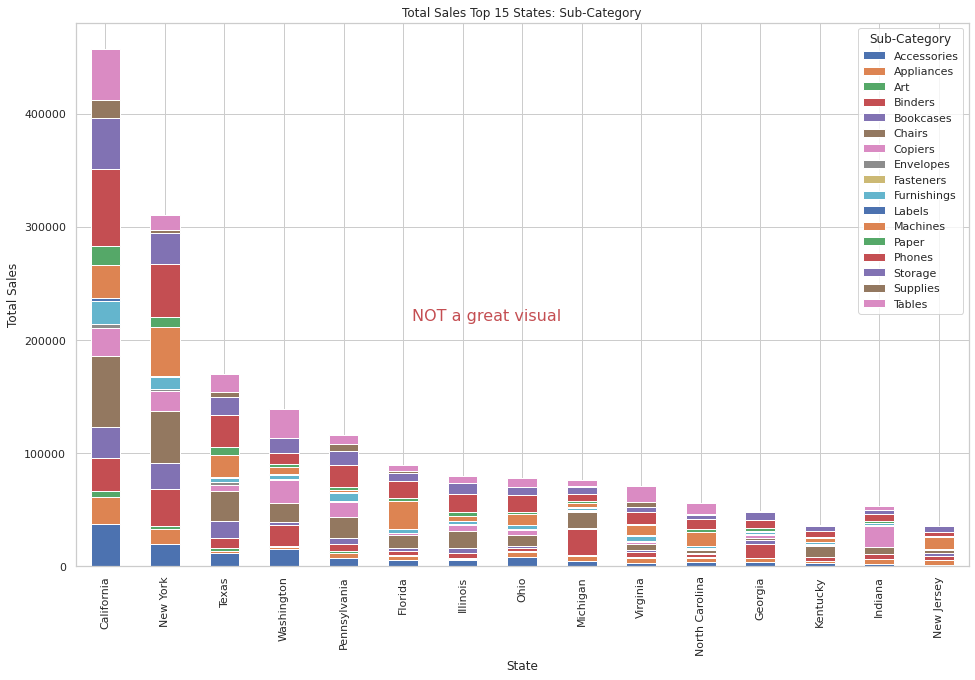

In [26]:
grouped_df = top15_df.groupby(['State', 'Sub-Category']).agg({'Sales':'sum'}).reset_index()
grouped_df.head()
grouped_df = grouped_df.pivot(index='State', columns='Sub-Category', values='Sales').reset_index()
grouped_df['Total'] = sum([grouped_df[col] for col in subcat_cols])
grouped_df = grouped_df.sort_values(by='Total', ascending=False)
grouped_df.drop(columns='Total', inplace=True)

grouped_df.head()

grouped_df.set_index('State').plot(kind='bar', stacked=True, figsize=(16,10))
plt.title('Total Sales Top 15 States: Sub-Category')
plt.ylabel('Total Sales')

left = 0.01
width = 0.9
bottom  = 0.01
height = 0.9
right = left + width
top = bottom + height
ax = plt.gca()

ax.set_transform(ax.transAxes)

ax.text(0.5 * (left + right), 0.5 * (bottom + top), 'NOT a great visual',
        horizontalalignment='center',
        verticalalignment='center',
        size= 16,
        color='r',
        transform=ax.transAxes)

plt.show()

Well, the abundance of sub-categories makes this graph quite cluttered. Let's look at just the top 5-7 sub-categories in terms of total sales and see what it looks like then. It would also make coloring the graph much easier.

In [27]:
top15_df['Sub-Category'].value_counts()

Binders        1196
Paper          1060
Furnishings     756
Phones          707
Storage         661
Art             627
Accessories     600
Chairs          495
Appliances      373
Labels          294
Tables          249
Envelopes       205
Bookcases       177
Fasteners       174
Supplies        151
Machines         99
Copiers          57
Name: Sub-Category, dtype: int64

Our definition of 'top 5' sub-categories here being the sub-categories with the most sales records.

In [28]:
top5_subcats = top15_df['Sub-Category'].value_counts().index.values.tolist()[:5]
top5_subcats

['Binders', 'Paper', 'Furnishings', 'Phones', 'Storage']

In [29]:
top15_topsubcats = top15_df[top15_df['Sub-Category'].isin(top5_subcats)]

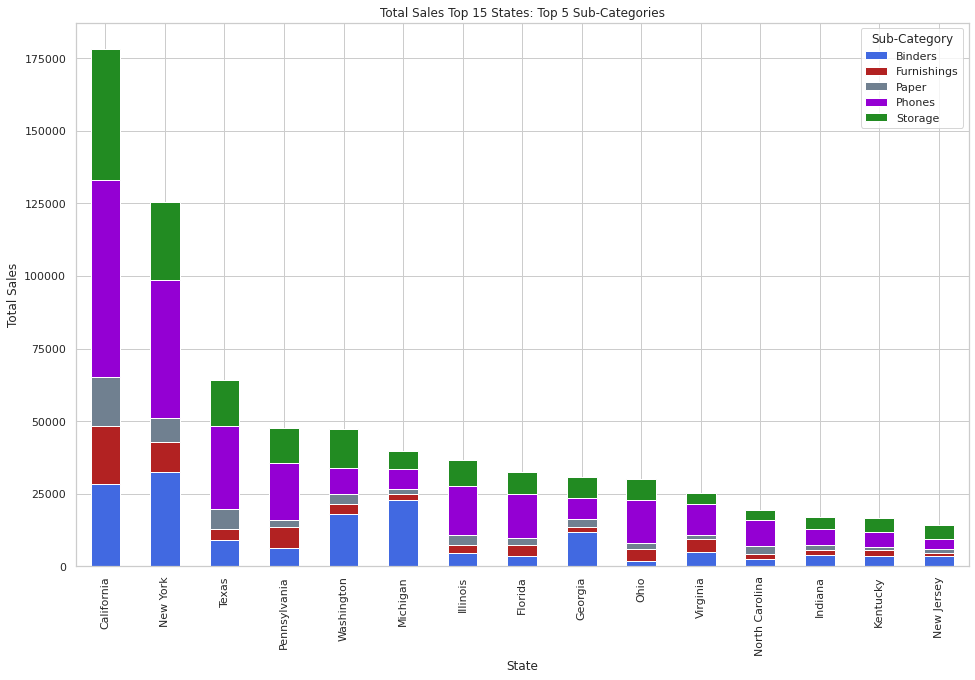

In [30]:
grouped_df = top15_topsubcats.groupby(['State', 'Sub-Category']).agg({'Sales':'sum'}).reset_index()
grouped_df.head()
grouped_df = grouped_df.pivot(index='State', columns='Sub-Category', values='Sales').reset_index()
grouped_df['Total'] = sum([grouped_df[col] for col in top5_subcats])
grouped_df = grouped_df.sort_values(by='Total', ascending=False)
grouped_df.drop(columns='Total', inplace=True)

grouped_df.head()

grouped_df.set_index('State').plot(kind='bar', stacked=True, color = ['royalblue', 'firebrick', 'slategray', 'darkviolet', 'forestgreen'], figsize=(16,10))
plt.title('Total Sales Top 15 States: Top 5 Sub-Categories')
plt.ylabel('Total Sales')

plt.show()

Now THIS is much more clear and palatable. We can see for almost all the states here, phones and storage are quite popular products if not binders.

In [31]:
top5p_subcats = top10p_df['Sub-Category'].value_counts().index.values.tolist()[:5]
top5p_subcats

['Binders', 'Paper', 'Furnishings', 'Phones', 'Storage']

In [32]:
top10p_topsubcats = top10p_df[top10p_df['Sub-Category'].isin(top5p_subcats)]

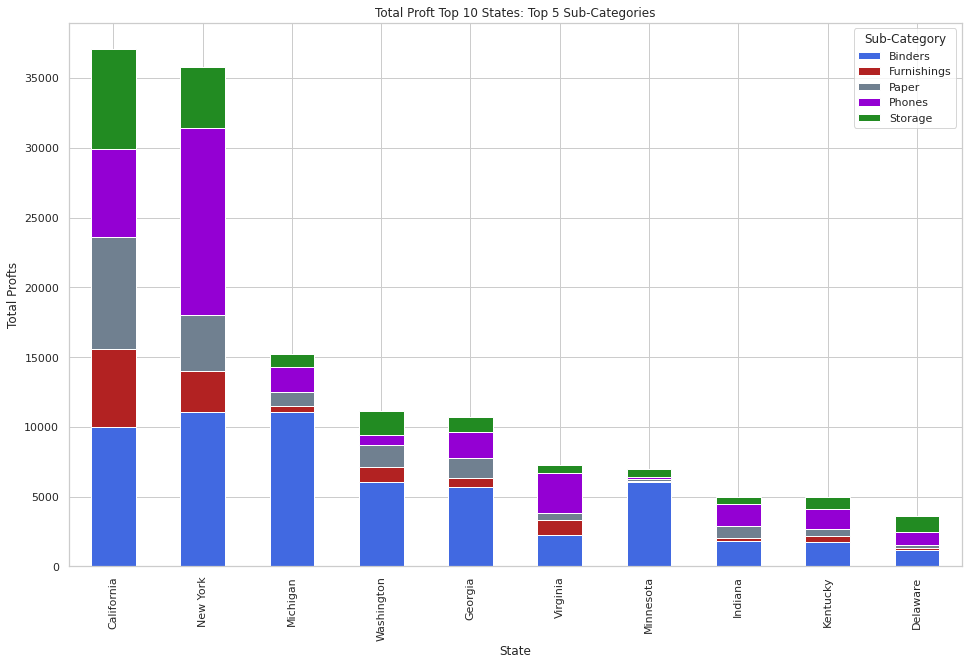

In [33]:
grouped_df = top10p_topsubcats.groupby(['State', 'Sub-Category']).agg({'Profit':'sum'}).reset_index()
grouped_df.head()
grouped_df = grouped_df.pivot(index='State', columns='Sub-Category', values='Profit').reset_index()
grouped_df['Total'] = sum([grouped_df[col] for col in top5_subcats])
grouped_df = grouped_df.sort_values(by='Total', ascending=False)
grouped_df.drop(columns='Total', inplace=True)

grouped_df.head()

grouped_df.set_index('State').plot(kind='bar', stacked=True, color = ['royalblue', 'firebrick', 'slategray', 'darkviolet', 'forestgreen'], figsize=(16,10))
plt.title('Total Proft Top 10 States: Top 5 Sub-Categories')
plt.ylabel('Total Profts')

plt.show()

It seems phones, binders, and storage are quite popular among these states.

Now that we've gotten a good look at popular products among the states with the highest sales yields. Let's try to look at some metrics over time. 

<b>Let's take a look at the sales & profits over time.</b>

Text(0.5, 1.0, 'Sales & Profit Average Over Time')

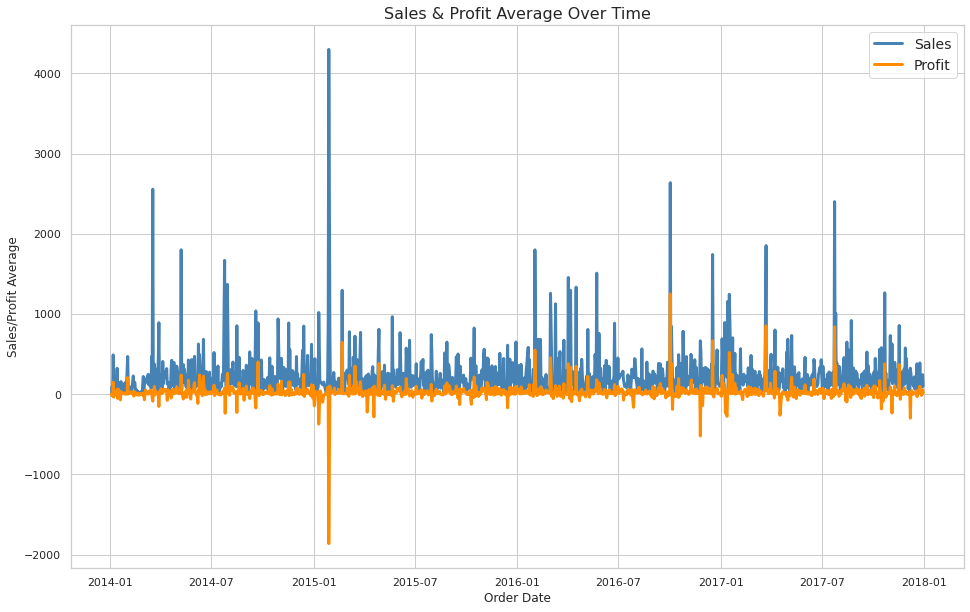

In [34]:
figure = plt.figure(figsize=(16,10))
time_df = df[['Order Date', 'Sales', 'Profit']].sort_values(by='Order Date')
time_df_avg = time_df.groupby('Order Date').agg({'Sales':'mean', 'Profit':'mean'})

plt.plot(time_df_avg.index, time_df_avg['Sales'], color='steelblue', label='Sales', linewidth=3)
plt.plot(time_df_avg.index, time_df_avg['Profit'], color='darkorange', label='Profit', linewidth=3)
plt.xlabel('Order Date')
plt.ylabel('Sales/Profit Average')
plt.legend(fontsize=14)
plt.title('Sales & Profit Average Over Time', size=16)


We can see there are some rises and dips. We got a big dip at the beginning of 2015. Since then, there hasn't been one like it.

Text(0.5, 1.0, 'Sales & Profit Average Over Time (per Month)')

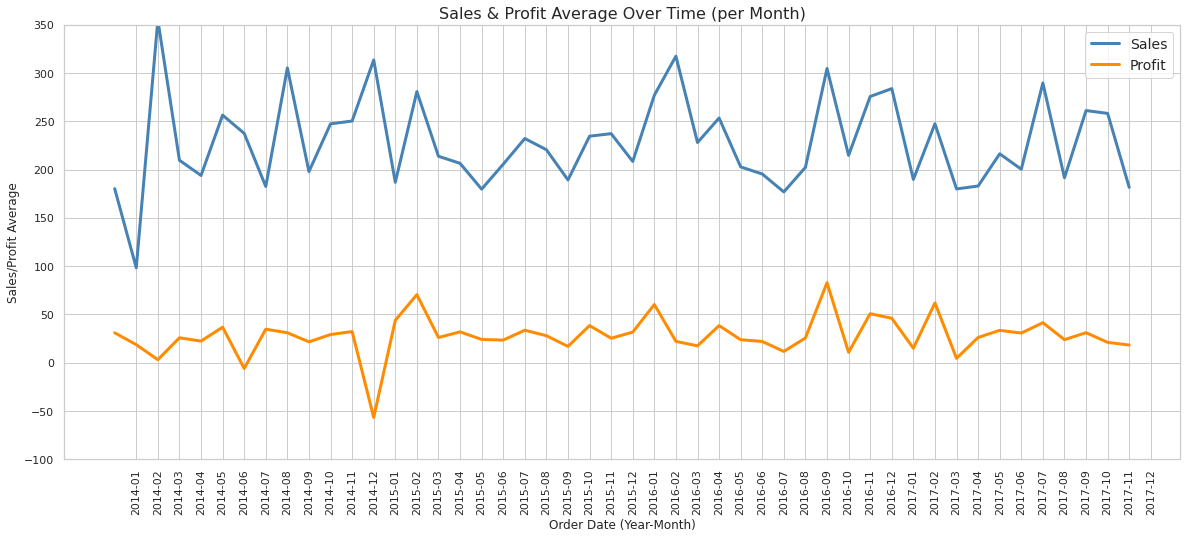

In [35]:
figure = plt.figure(figsize=(20,8))
time_df = df[['Order Date', 'Sales', 'Profit']].sort_values(by='Order Date')
time_df['MonthYr'] = pd.to_datetime(df['Order Date']).dt.to_period('M')
time_df

time_df_avg = time_df.groupby('MonthYr').agg({'Sales':'mean', 'Profit':'mean'}).reset_index()
time_df_avg


plt.plot(time_df_avg.index, time_df_avg['Sales'], color='steelblue', label='Sales', linewidth=3)
plt.plot(time_df_avg.index, time_df_avg['Profit'], color='darkorange', label='Profit', linewidth=3)
plt.xlabel('Order Date (Year-Month)')
labels = time_df_avg['MonthYr'].values
plt.xticks(range(1,time_df_avg.shape[0]+1), labels=labels)
plt.xticks(rotation=90)
plt.ylim([-100, 350])
plt.ylabel('Sales/Profit Average')
plt.legend(fontsize=14)
plt.title('Sales & Profit Average Over Time (per Month)', size=16)

A couple times, the average profits per month went below 0.

<b>What are the amounts of Sales and Profits per Region?</b>

In [36]:
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [37]:
#Currently taking into account all records. Not just records with net positive profits or any other condition.
region_df = df.groupby('Region').agg({'Sales':'sum', 'Profit':'sum'})
region_df

,Sales,Profit
Region,,
Central,501239.8908,39706.3625
East,678781.2400,91522.7800
South,391721.9050,46749.4303
West,725457.8245,108418.4489


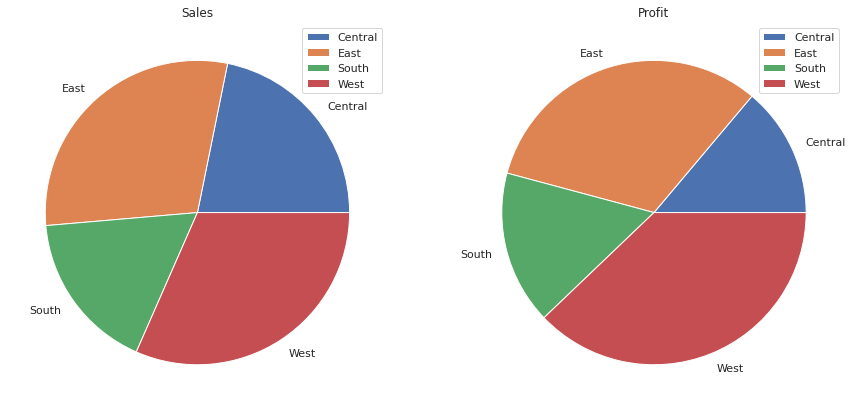

In [38]:
fig, axs = plt.subplots(1, 2)

g1 = region_df.plot.pie(y='Sales', figsize=(15,15), ax=axs[0])
g1.set_title('Sales')
g2 = region_df.plot.pie(y='Profit', figsize=(15,15), ax=axs[1])
g2.set_title('Profit')
g1.set_ylabel(None)
g2.set_ylabel(None)
#plot = region_df.plot.pie(subplots=True, figsize=(15, 15))
plt.show()

We can gather from these pie charts that the highest percentages of both sales and profit come from the west. It's interesting that just 2 of the top 15 states are western states.

So far, we know that the heavily populated states are the main drivers of sales and profit. Phones and binders are the larger drivers of product sales compared to the other product categories.

In [39]:
spec_list = [1 if s == 'California' else 0 for s in df['State']]
west_df = df.copy()
west_df['Cali. State'] = spec_list
west_df = west_df[west_df['Region']=='West']
west_df['Cali. State'] = west_df['Cali. State'].map({0:'Non-Cali. State', 1:'California'})
west_df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Cali. State
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.620,2,0.0,6.8714,California
5,6,CA-2014-115812,2014-06-09,2014-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,California,90032,West,FUR-FU-10001487,Furniture,Furnishings,Eldon Expressions Wood and Plastic Desk Access...,48.860,7,0.0,14.1694,California
6,7,CA-2014-115812,2014-06-09,2014-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,California,90032,West,OFF-AR-10002833,Office Supplies,Art,Newell 322,7.280,4,0.0,1.9656,California
7,8,CA-2014-115812,2014-06-09,2014-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,California,90032,West,TEC-PH-10002275,Technology,Phones,Mitel 5320 IP Phone VoIP phone,907.152,6,0.2,90.7152,California
8,9,CA-2014-115812,2014-06-09,2014-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,California,90032,West,OFF-BI-10003910,Office Supplies,Binders,DXL Angle-View Binders with Locking Rings by S...,18.504,3,0.2,5.7825,California


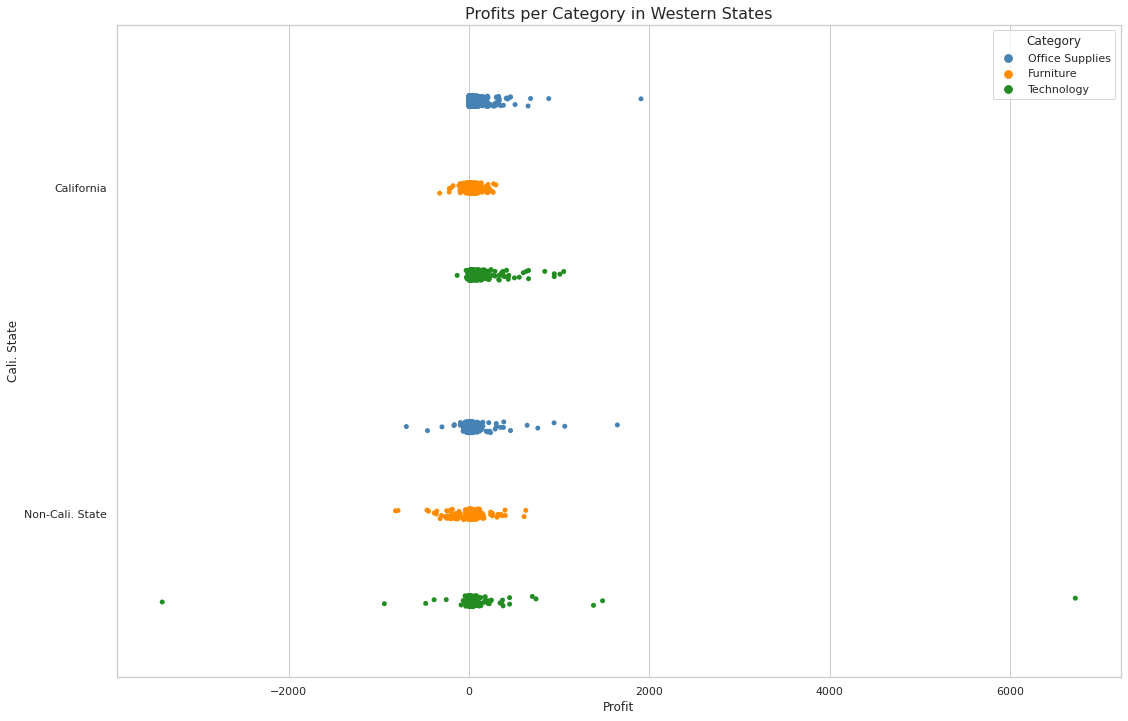

In [40]:
plt.figure(figsize=(18,12)) #DO THIS FOR WESTERN STATES AND COMPARE TO CALIFORNIA. then sales vs porfits in cali vs. other
#western states.
sns.stripplot(data=west_df, x='Profit', y='Cali. State', hue='Category', dodge=True, jitter=0.05, palette=['steelblue', 'darkorange', 'forestgreen'])
plt.title('Profits per Category in Western States', size=16)
plt.show()

The center regions of the categories don't differ much, but it seems furniture in California accounts for more of a loss in profits than the other product categories.

There also seems to be more proft loss records in the lower parts of the non-California western states. This is an example of how getting answers from some plots can lead to more fine-grained questions!

There are also more sales records for California alone vs. the other westner states, so based on this chart we have higher chances of profitability in California than the other western states.

Since Texas recorded the largetst net loss in profits, what kinds of products are driving it down?

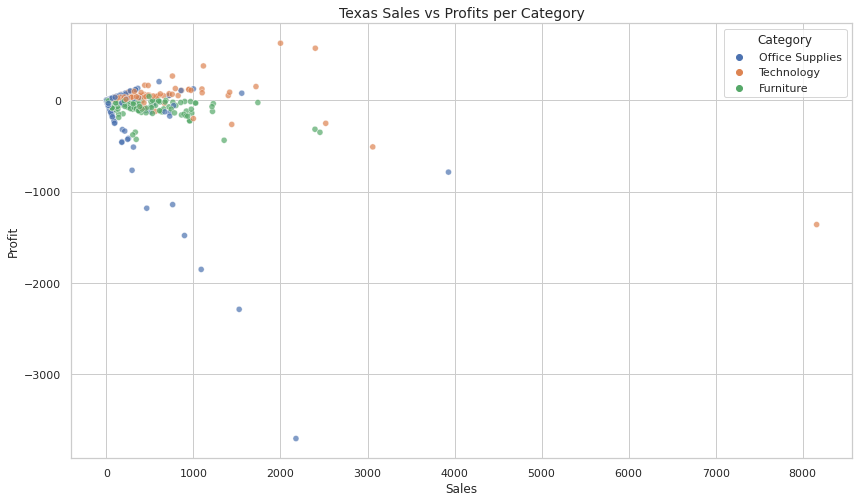

In [41]:
plt.figure(figsize=(14,8))
texas_df = df[df['State']=='Texas']
sns.scatterplot(data=texas_df, x='Sales', y='Profit', hue='Category', alpha=0.7)
plt.title('Texas Sales vs Profits per Category', fontsize=14)
plt.show()

We can see that most of the products driving profit down in Texas are either Office Supplies or Furniture.

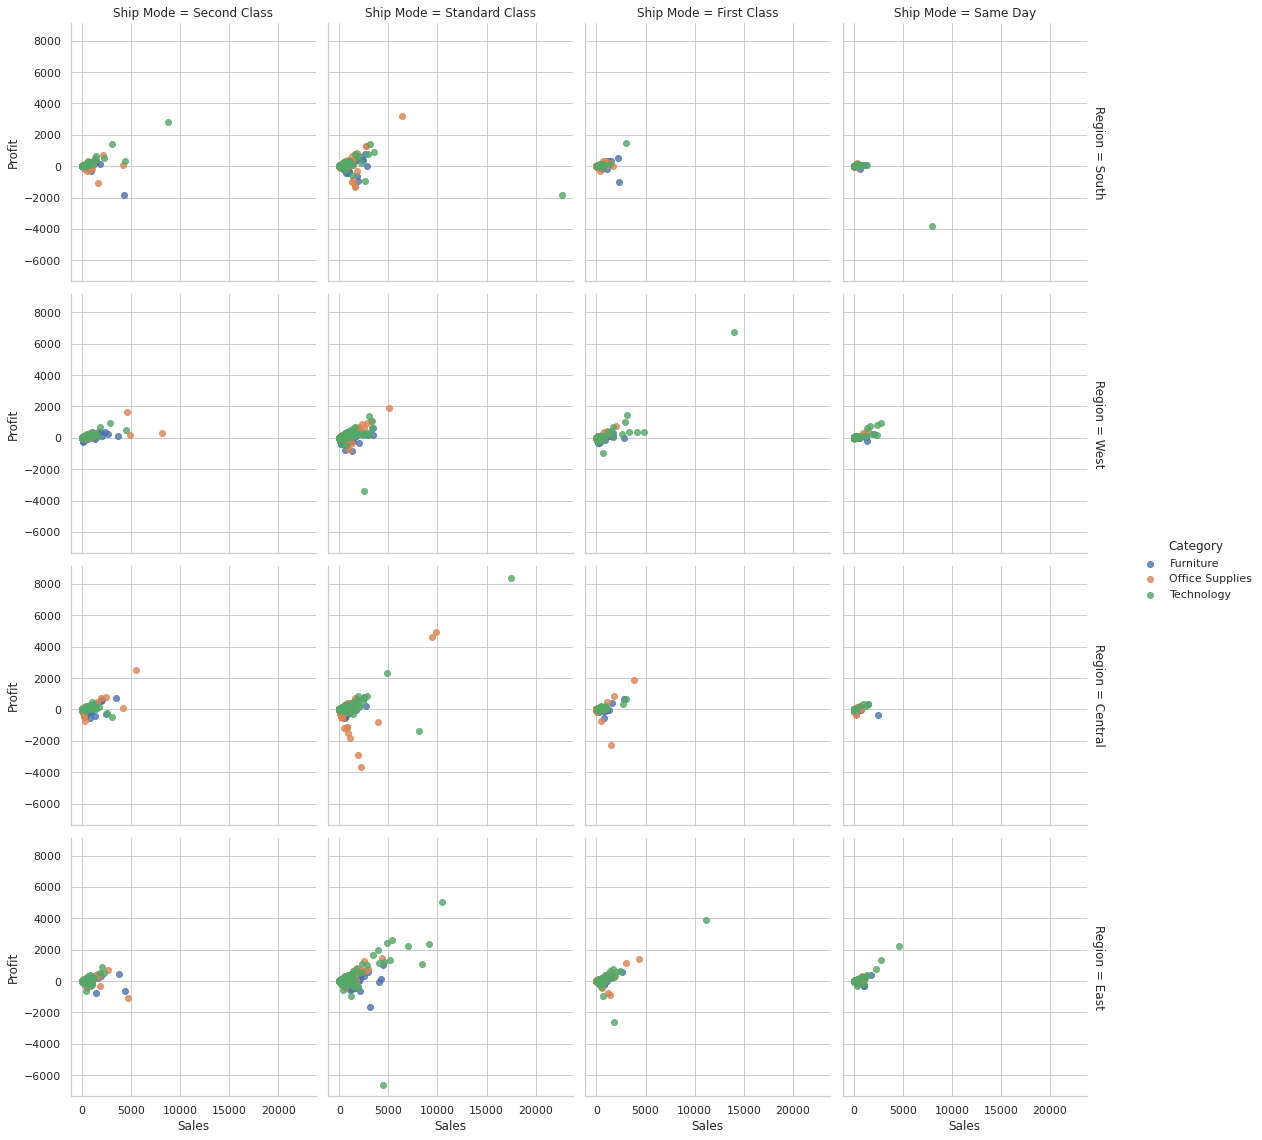

In [42]:
g = sns.FacetGrid(df, row="Region", col="Ship Mode", hue='Category', margin_titles=True, height=4, aspect=1)
g.map(sns.regplot, "Sales", "Profit", fit_reg=False, x_jitter=.1)
g.add_legend()

Looking at the graphs that stand out, we can see what kind of behavior these groups have. For instance, technological sales look to make more of the positive profits. In the central region, we can see some outstandish office supplies records recording negative profit losses.

It seems <b>Technology</b> has a better track record of being profitable vs. the other categories across these variables.

From making these disparate graphs, we can then look at the graphs of interest in further detail.

As far as Ship Mode, <b>Standard Class</b> looks to be the more popular option, while Same Day isn't very popular.

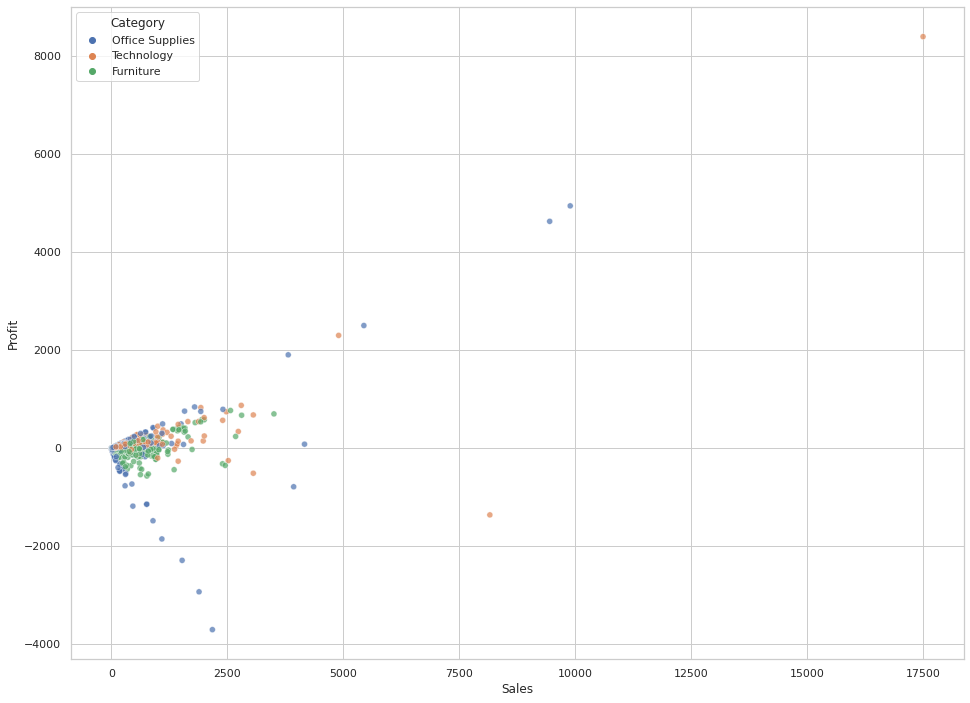

In [43]:
central_df = df[df['Region']=='Central']
plt.figure(figsize=(16,12))
g = sns.scatterplot(data=central_df, x='Sales', y='Profit', hue='Category', alpha=0.7)#, height=6, aspect=1)
plt.show(g)

To investigate technology further, I want to see if there is a difference between profitable technology sales and the non-profitable technology sales.

In [44]:
pos_tech_df = df[(df['Category']=='Technology')].copy()
pos_tech = [1 if s > 0 else 0 for s in pos_tech_df['Profit']]
pos_tech_df.loc[:, '+ Profit'] = pos_tech.copy()
pos_tech_df['+ Profit'] = pos_tech_df['+ Profit'].map({0:'Negative', 1:'Positive'})
pos_tech_df['+ Profit'].value_counts()

Positive    1573
Negative     274
Name: + Profit, dtype: int64

We can see a large majority of the technology records have positive profits. Is there a stark difference between the positive and negative records for a particular reason? Let's find out.

In [45]:
pos_tech_df['Sub-Category'].value_counts()

Phones         889
Accessories    775
Machines       115
Copiers         68
Name: Sub-Category, dtype: int64

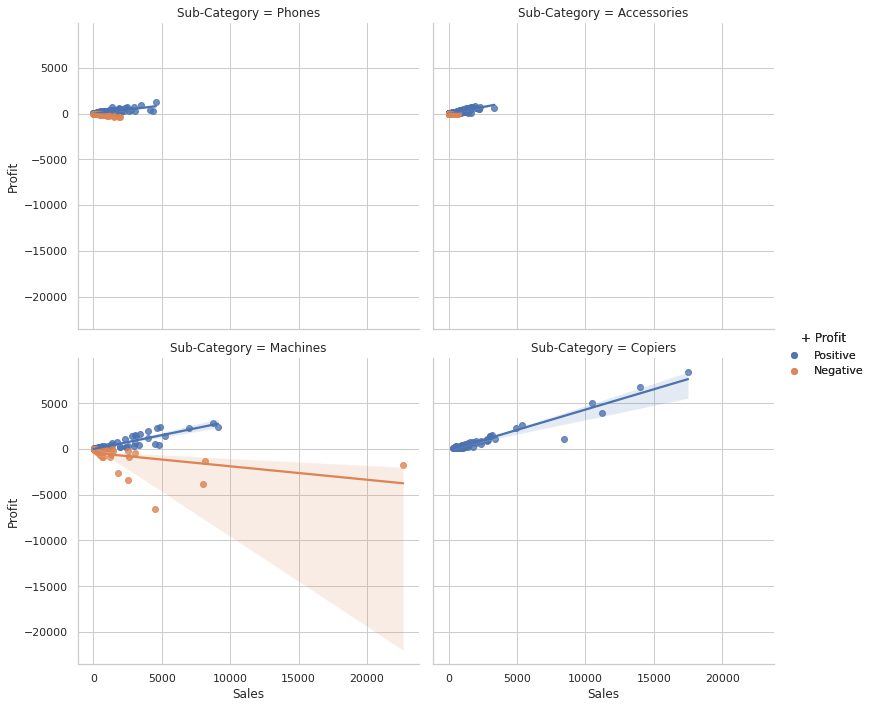

In [46]:
g = sns.lmplot(
    data=pos_tech_df,
    x="Sales", y="Profit", hue="+ Profit", col='Sub-Category',
    height=5, aspect=1, col_wrap=2
)
g.add_legend()

We can see some distinction, though we must keep in mind there are more records for phones and accessories than machines and copiers. Also, phones and accessories have more neutral behavior than machines and copiers. 

What we can see is that <b>machines are accounting for a loss in profits compared to copiers</b>, which seem to have minimal to no negative profit records.

In [47]:
pos_fr_df = df[(df['Category']=='Furniture')].copy()
pos_fr = [1 if s > 0 else 0 for s in pos_fr_df['Profit']]
pos_fr_df.loc[:, '+ Profit'] = pos_fr.copy()
pos_fr_df['+ Profit'] = pos_fr_df['+ Profit'].map({0:'Negative', 1:'Positive'})
pos_fr_df['+ Profit'].value_counts()

Positive    1374
Negative     747
Name: + Profit, dtype: int64

In [48]:
pos_fr_df['Sub-Category'].value_counts()

Furnishings    957
Chairs         617
Tables         319
Bookcases      228
Name: Sub-Category, dtype: int64

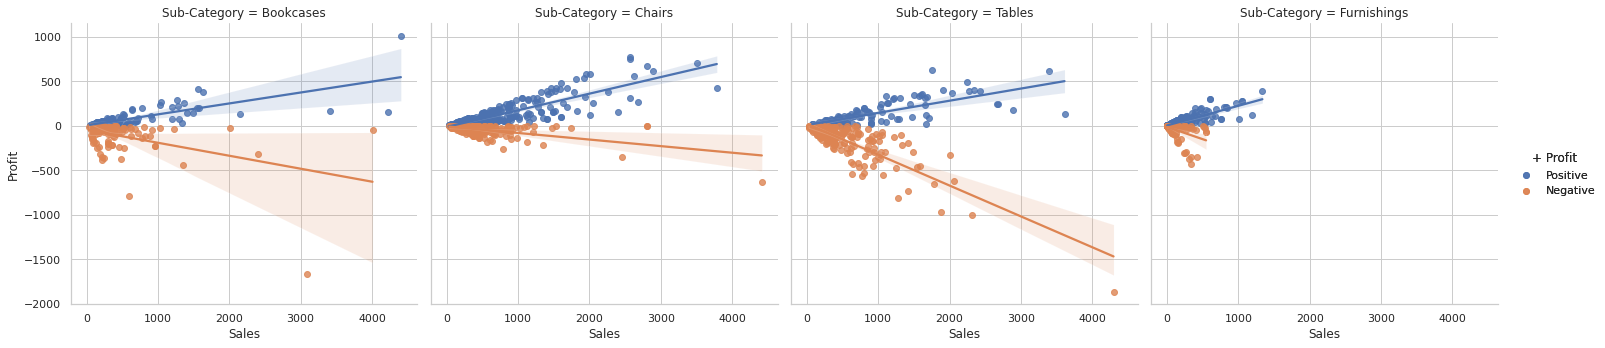

In [49]:
g = sns.lmplot(
    data=pos_fr_df,
    x="Sales", y="Profit", hue="+ Profit", col='Sub-Category',
    height=5, aspect=1
)
g.add_legend()

It looks even across sub-categories for Furniture.

Why not do the same for Office Supplies?

In [50]:
pos_os_df = df[(df['Category']=='Office Supplies')].copy()
pos_os = [1 if s > 0 else 0 for s in pos_os_df['Profit']]
pos_os_df.loc[:, '+ Profit'] = pos_os.copy()
pos_os_df['+ Profit'] = pos_os_df['+ Profit'].map({0:'Negative', 1:'Positive'})
pos_os_df['+ Profit'].value_counts()

Positive    5111
Negative     915
Name: + Profit, dtype: int64

In [51]:
pos_os_df['Sub-Category'].value_counts()

Binders       1523
Paper         1370
Storage        846
Art            796
Appliances     466
Labels         364
Envelopes      254
Fasteners      217
Supplies       190
Name: Sub-Category, dtype: int64

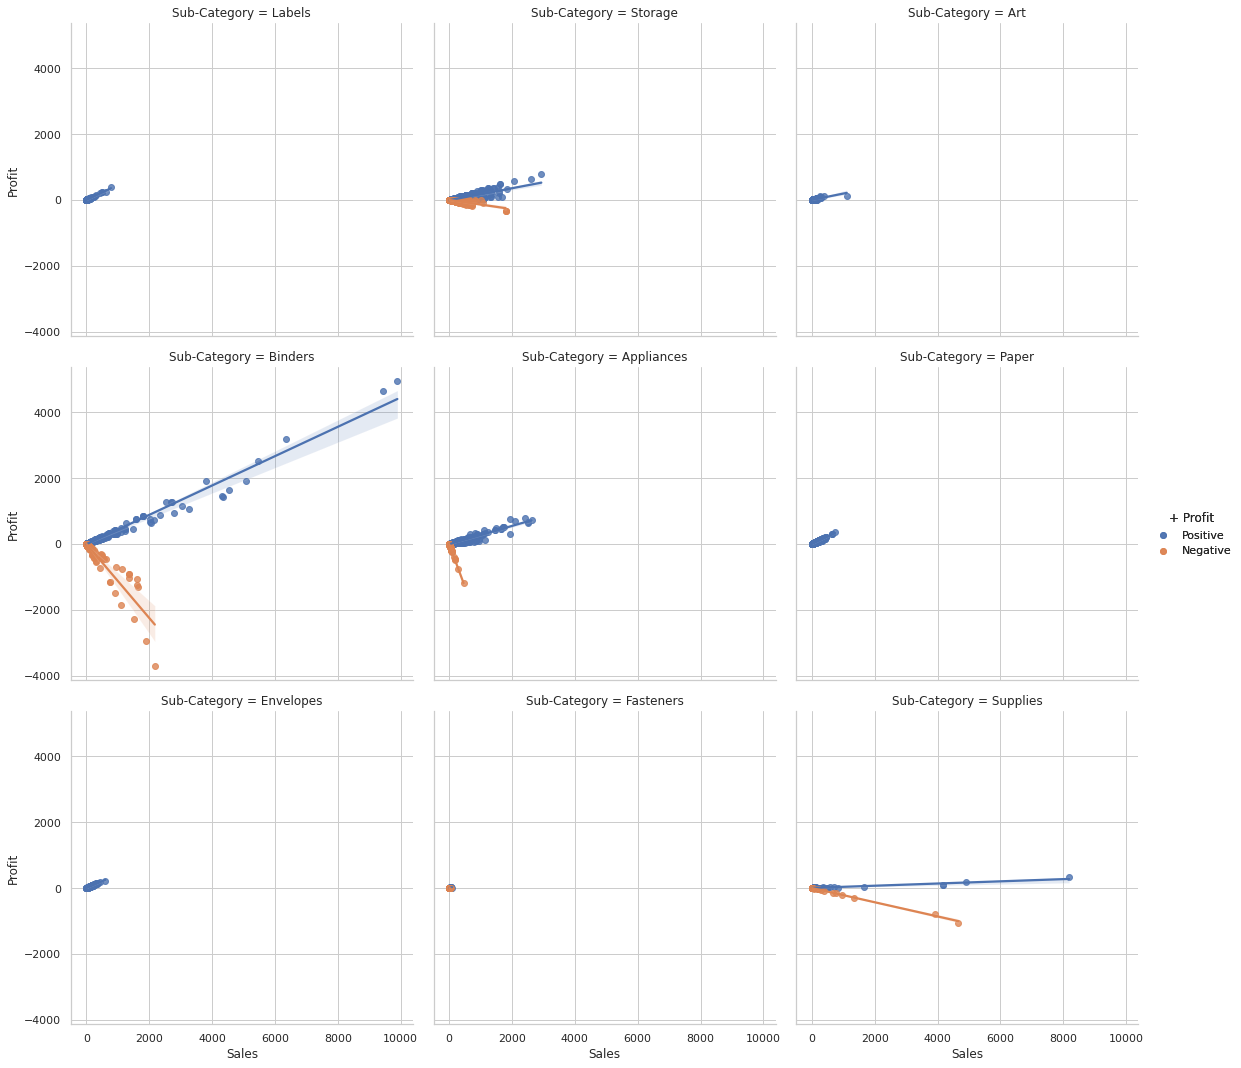

In [52]:
g = sns.lmplot(
    data=pos_os_df,
    x="Sales", y="Profit", hue="+ Profit", col='Sub-Category',
    height=5, aspect=1, col_wrap=3
)
g.add_legend()

For office supplies, we can see some products, for one reason or another, have dissimilar records of loss in profits.

Binders followed by paper have the most records. Though, paper doesn't seem to record any loss in profits while binders do.

Do we have the data to discern where the negative records are coming from? Perhaps by region or consumer segment?

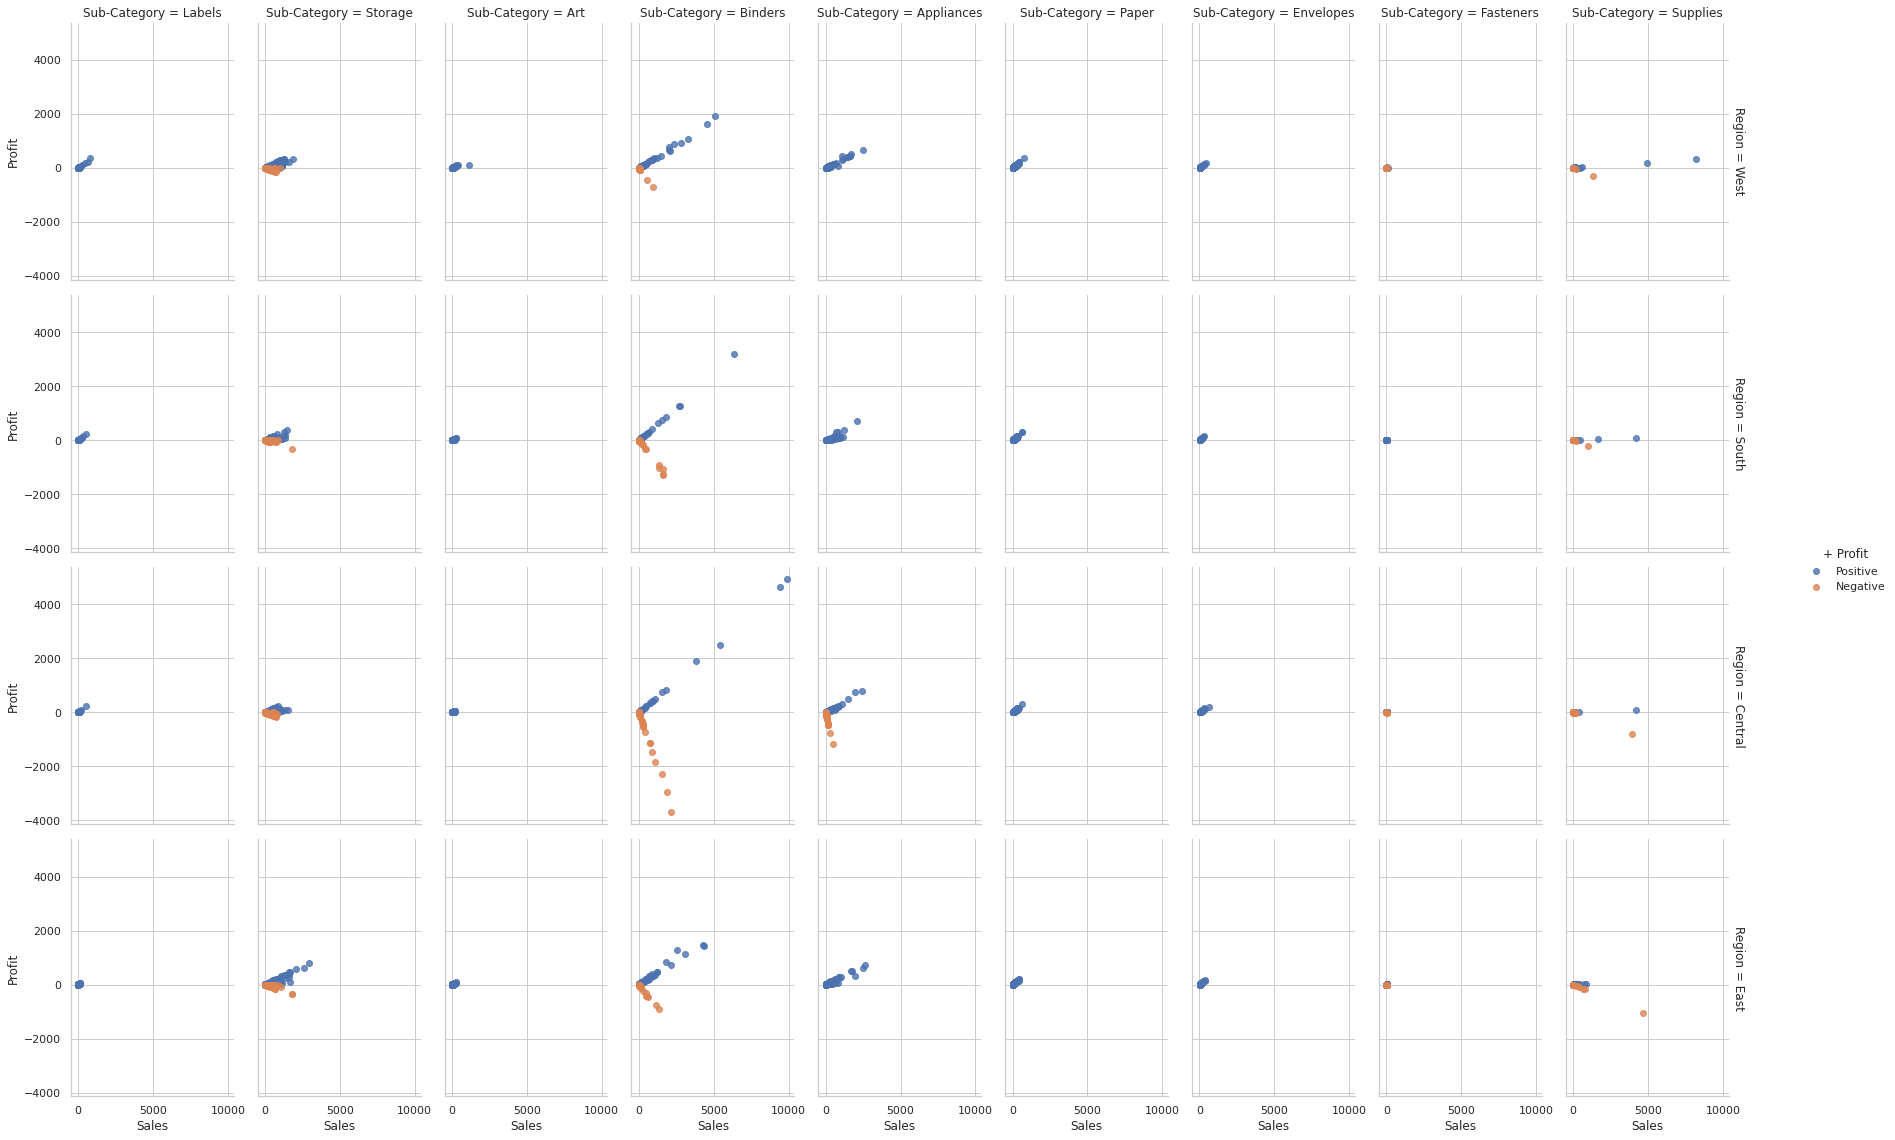

In [53]:
g = sns.FacetGrid(pos_os_df, row="Region", col="Sub-Category", hue='+ Profit', margin_titles=True, height=4, aspect=0.7)
g.map(sns.regplot, "Sales", "Profit", fit_reg=False, x_jitter=.1)
g.add_legend()

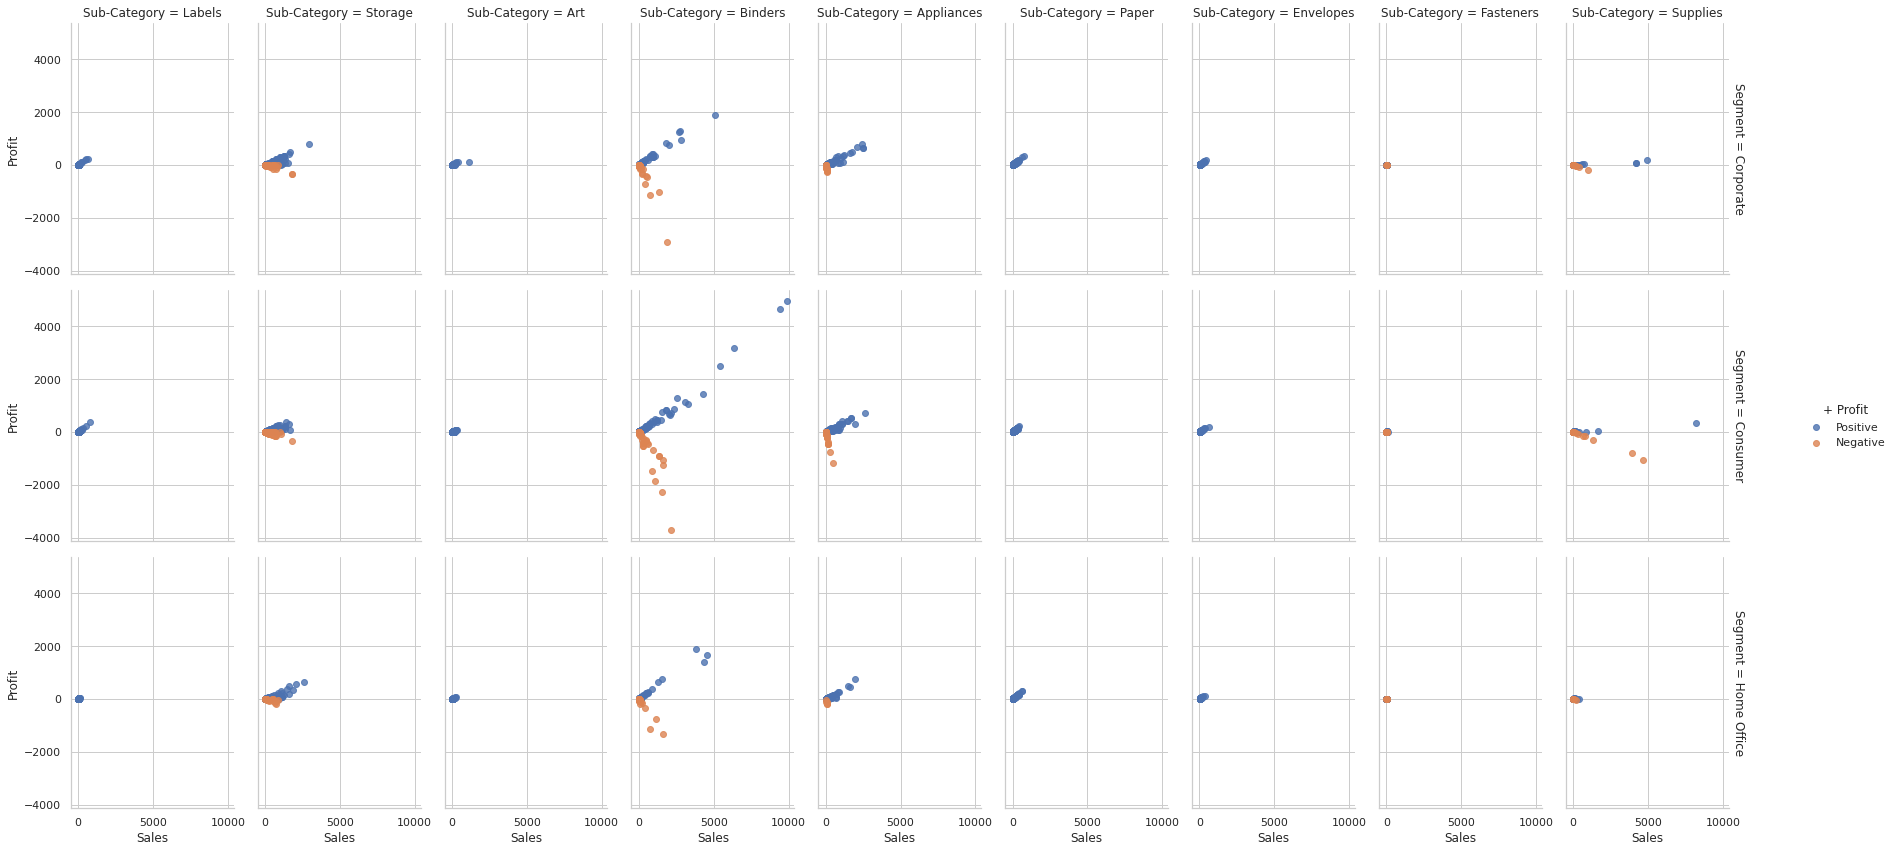

In [54]:
g = sns.FacetGrid(pos_os_df, row="Segment", col="Sub-Category", hue='+ Profit', margin_titles=True, height=4, aspect=0.7)
g.map(sns.regplot, "Sales", "Profit", fit_reg=False, x_jitter=.1)
g.add_legend()

We can see across each region and consumer segment the sub-categories have fairly similar behavior. Therefore, I'm not sure if we can discern from this data what the cause of the negative records of profits are.

### Negative Profit States Analysis

Now that I've looked at Sales & Profits together across all states. I now want to focus on the states that recorded net negative profits. 

In [55]:
grouped_df = df.groupby('State').sum()[['Profit']].reset_index().sort_values(by='Profit', ascending=False)
grouped_df

,State,Profit
3,California,76381.3871
30,New York,74038.5486
45,Washington,33402.6517
20,Michigan,24463.1876
44,Virginia,18597.9504
12,Indiana,18382.9363
9,Georgia,16250.0433
15,Kentucky,11199.6966
21,Minnesota,10823.1874
6,Delaware,9977.3748


In [56]:
states_neg_pro = ['Oregon', 'Florida', 'Arizona', 'Tenessee', 'Colorado', 'North Carolina', 'Illinois', 'Pennsylvania', 'Ohio', 'Texas']
states_neg_pro_df = df[df['State'].isin(states_neg_pro)]
states_neg_pro_df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164
12,13,CA-2017-114412,2017-04-15,2017-04-20,Standard Class,AA-10480,Andrew Allen,Consumer,United States,Concord,North Carolina,28027,South,OFF-PA-10002365,Office Supplies,Paper,Xerox 1967,15.5520,3,0.20,5.4432
14,15,US-2015-118983,2015-11-22,2015-11-26,Standard Class,HP-14815,Harold Pawlan,Home Office,United States,Fort Worth,Texas,76106,Central,OFF-AP-10002311,Office Supplies,Appliances,Holmes Replacement Filter for HEPA Air Cleaner...,68.8100,5,0.80,-123.8580
15,16,US-2015-118983,2015-11-22,2015-11-26,Standard Class,HP-14815,Harold Pawlan,Home Office,United States,Fort Worth,Texas,76106,Central,OFF-BI-10000756,Office Supplies,Binders,Storex DuraTech Recycled Plastic Frosted Binders,2.5440,3,0.80,-3.8160


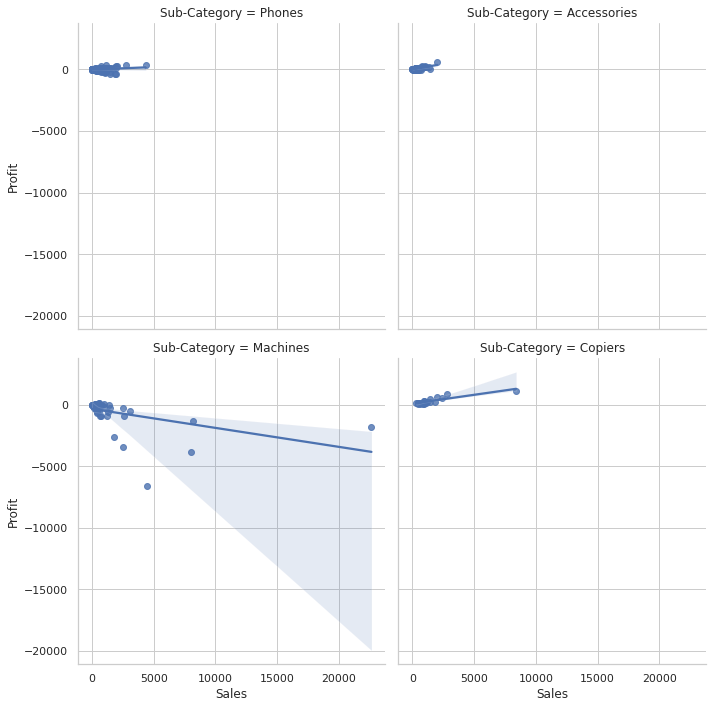

In [57]:
states_neg_pro_df1 = states_neg_pro_df[states_neg_pro_df['Category']=='Technology']
g = sns.lmplot(
    data=states_neg_pro_df1,
    x="Sales", y="Profit", col='Sub-Category',
    height=5, aspect=1, col_wrap=2
)
g.add_legend()
plt.show()

We may have found something here that is similar to the previous analysis on the Technology category: Copiers don't seem to have negative profit records, while just about all records of Machines have very little to negative profits.

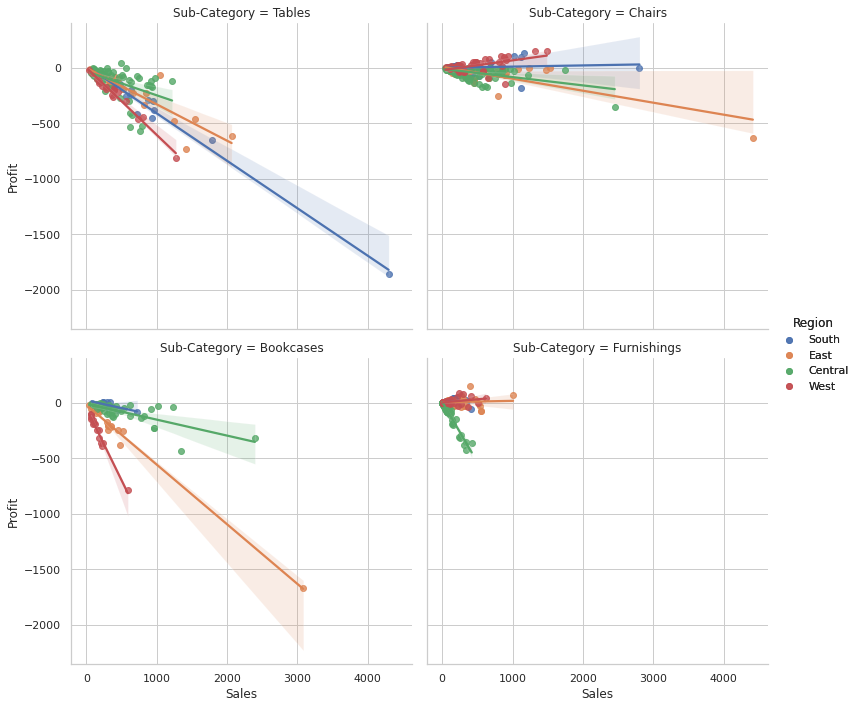

In [58]:
states_neg_pro_df2 = states_neg_pro_df[states_neg_pro_df['Category']=='Furniture']
g = sns.lmplot(
    data=states_neg_pro_df2,
    x="Sales", y="Profit", col='Sub-Category', hue='Region', hue_order=['South', 'East', 'Central', 'West'],
    height=5, aspect=1, col_wrap=2
)
g.add_legend()
plt.show()

<b>Tables and Bookcases have all very little to negative profit records</b> in the states selected. Furthermore, <b>Central Region states aren't doing so well in profits with Furnishings.</b>

Lastly, lets analyze the office supplies category.

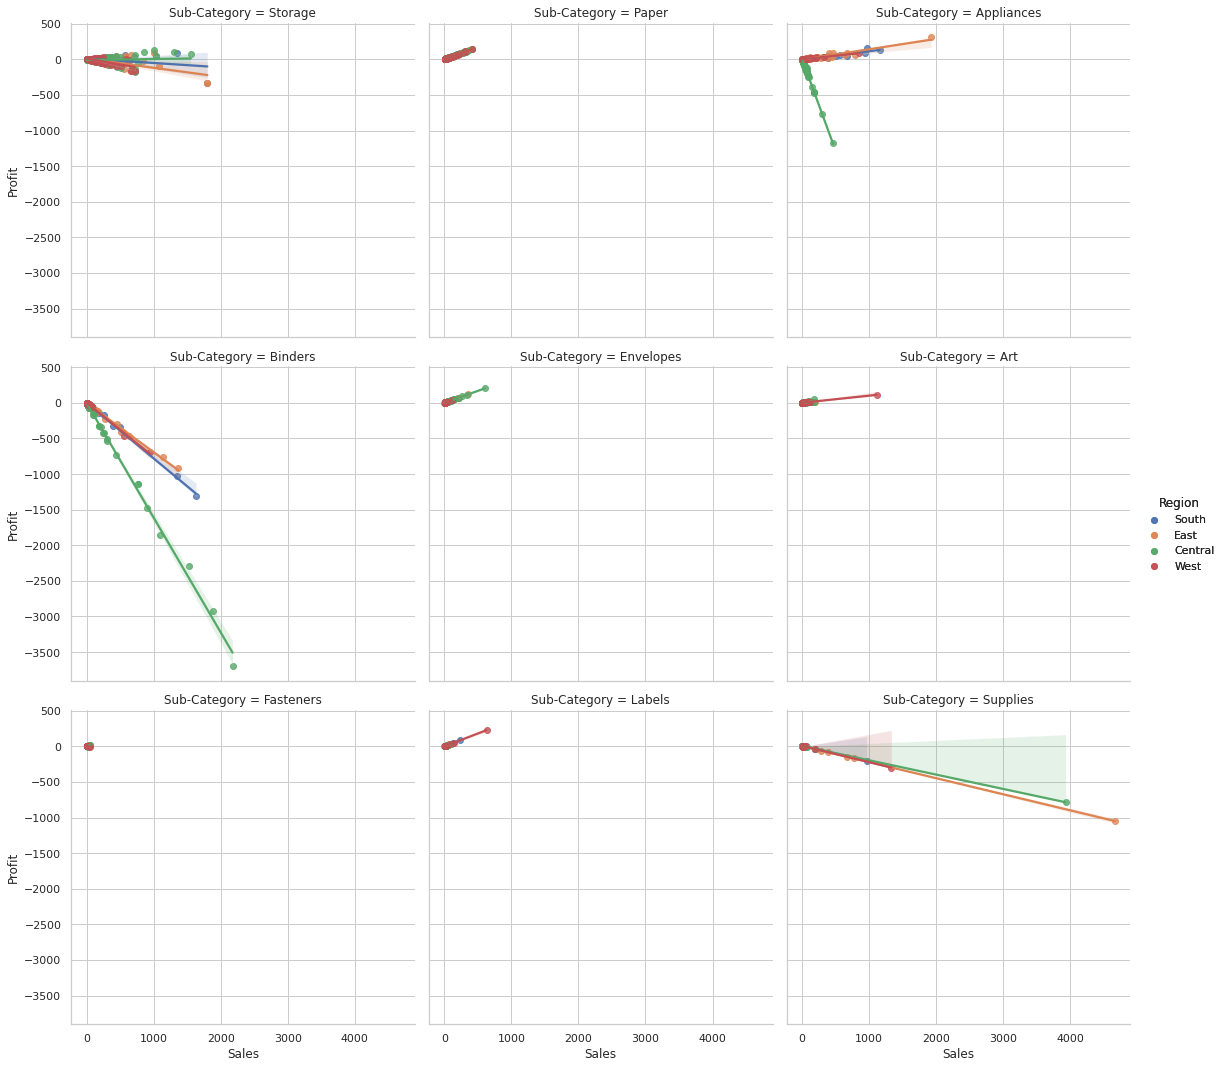

In [59]:
states_neg_pro_df3 = states_neg_pro_df[states_neg_pro_df['Category']=='Office Supplies']
g = sns.lmplot(
    data=states_neg_pro_df3,
    x="Sales", y="Profit", col='Sub-Category', hue='Region', hue_order=['South', 'East', 'Central', 'West'],
    height=5, aspect=1, col_wrap=3
)
g.add_legend()
plt.show()

Binders and Supplies are where heavy focus is needed among these states. I added an additional level of detail with Region here to maintain if there is a difference. In result, <b>there appears to be a heavier negative profit loss with Binders and Appliances in the Central region states.</b>

## Feature Analysis & Transformation, PCA

(Original PCA learning reference):
* https://www.kaggle.com/code/ryanholbrook/principal-component-analysis

In [60]:
model_df = df.copy()
model_df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [61]:
model_df.drop(columns='Country', inplace=True) #All records are from the United States, therefore it would not provide
#importance for a model
model_df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,Los Angeles,California,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,Fort Lauderdale,Florida,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,Fort Lauderdale,Florida,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [62]:
model_df['Ship Date'].iloc[0]

Timestamp('2016-11-11 00:00:00')

In [63]:
model_df['Product Name'].nunique() #Very high cardinality column, we can drop this column.

1850

In [64]:
model_df.drop(columns='Product Name', inplace=True)

In [65]:
model_df.head() #sub category can stay, it only has got 17 unique vals.

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,731.9400,3,0.00,219.5820
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,Los Angeles,California,90036,West,OFF-LA-10000240,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,Fort Lauderdale,Florida,33311,South,FUR-TA-10000577,Furniture,Tables,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,Fort Lauderdale,Florida,33311,South,OFF-ST-10000760,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [66]:
model_df['City'].nunique()

531

We'll also drop other ID columns and columns with extreme cardinality that won't help us with predictions.

In [67]:
model_df.drop(columns=['Order ID', 'Order Date', 'Ship Date', 'Customer ID', 'Customer Name', 'Postal Code', 'Product ID'], inplace=True)

In [68]:
model_df.drop(columns='Row ID', inplace=True)

In [69]:
model_df.head() #we now have to define a target column.

,Ship Mode,Segment,City,State,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,Henderson,Kentucky,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,Henderson,Kentucky,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,Los Angeles,California,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,Fort Lauderdale,Florida,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,Fort Lauderdale,Florida,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [70]:
new_cols = ['Ship Mode', 'Segment', 'City', 'State', 'Region', 'Category', 'Sub-Category', 'Quantity', 'Discount', 'Profit', 'Sales']
model_df_ra = model_df[new_cols].copy()

model_df_ra

,Ship Mode,Segment,City,State,Region,Category,Sub-Category,Quantity,Discount,Profit,Sales
0,Second Class,Consumer,Henderson,Kentucky,South,Furniture,Bookcases,2,0.00,41.9136,261.9600
1,Second Class,Consumer,Henderson,Kentucky,South,Furniture,Chairs,3,0.00,219.5820,731.9400
2,Second Class,Corporate,Los Angeles,California,West,Office Supplies,Labels,2,0.00,6.8714,14.6200
3,Standard Class,Consumer,Fort Lauderdale,Florida,South,Furniture,Tables,5,0.45,-383.0310,957.5775
4,Standard Class,Consumer,Fort Lauderdale,Florida,South,Office Supplies,Storage,2,0.20,2.5164,22.3680
...,...,...,...,...,...,...,...,...,...,...,...
9989,Second Class,Consumer,Miami,Florida,South,Furniture,Furnishings,3,0.20,4.1028,25.2480
9990,Standard Class,Consumer,Costa Mesa,California,West,Furniture,Furnishings,2,0.00,15.6332,91.9600
9991,Standard Class,Consumer,Costa Mesa,California,West,Technology,Phones,2,0.20,19.3932,258.5760
9992,Standard Class,Consumer,Costa Mesa,California,West,Office Supplies,Paper,4,0.00,13.3200,29.6000


In [71]:
X = model_df_ra.loc[:, :'Profit'].copy()
y = model_df_ra.loc[:, 'Sales'].copy() 

In [72]:
X_dupe = X.copy()

for col in X_dupe.select_dtypes("object"):
    X_dupe[col], _ = X_dupe[col].factorize()

discrete_features = X_dupe.dtypes == int

In [73]:
X_dupe

,Ship Mode,Segment,City,State,Region,Category,Sub-Category,Quantity,Discount,Profit
0,0,0,0,0,0,0,0,2,0.00,41.9136
1,0,0,0,0,0,0,1,3,0.00,219.5820
2,0,1,1,1,1,1,2,2,0.00,6.8714
3,1,0,2,2,0,0,3,5,0.45,-383.0310
4,1,0,2,2,0,1,4,2,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...
9989,0,0,100,2,0,0,5,3,0.20,4.1028
9990,1,0,116,1,1,0,5,2,0.00,15.6332
9991,1,0,116,1,1,2,7,2,0.20,19.3932
9992,1,0,116,1,1,1,10,4,0.00,13.3200


In [74]:
#mi_scores = mutual_info_regression(X_dupe, y, discrete_features=discrete_features)
#mi_scores = pd.Series(mi_scores, name="MI Scores", index=X_dupe.columns)
#mi_scores = mi_scores.sort_values(ascending=False)

In [75]:
#plt.figure(figsize=(16, 12))

#mi_scores = mi_scores.sort_values(ascending=True)
#width = np.arange(len(mi_scores))
#ticks = list(mi_scores.index)
#plt.barh(width, mi_scores)
#plt.yticks(width, ticks)
#plt.title("Mutual Information Scores")

Now lets scale the data so that all variables are on the same scale.

In [76]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_dupe)
X_scaled

array([[-1.42553938, -0.86416091, -0.80807187, ..., -0.8043034 ,
        -0.75664349,  0.05659251],
       [-1.42553938, -0.86416091, -0.80807187, ..., -0.35486486,
        -0.75664349,  0.81505408],
       [-1.42553938,  0.44716981, -0.80002794, ..., -0.8043034 ,
        -0.75664349, -0.09300169],
       ...,
       [-0.09069064, -0.86416091,  0.12502376, ..., -0.8043034 ,
         0.21215332, -0.03954647],
       [-0.09069064, -0.86416091,  0.12502376, ...,  0.09457367,
        -0.75664349, -0.06547279],
       [-1.42553938, -0.86416091,  0.98572404, ..., -0.8043034 ,
        -0.75664349,  0.18907752]])

In [77]:
#scale the data, maybe we won't have much outliers in this sense but at least standardize then apply PCA.
pca = PCA()
X_pca = pca.fit_transform(X_scaled)
X_pca = pd.DataFrame(X_pca, columns=[f"PC{i+1}" for i in range(X_pca.shape[1])])
X_pca

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10
0,-2.436603,-1.017855,1.919374,0.565551,-0.244432,-1.591685,-0.991881,-0.151391,0.358278,-0.311602
1,-2.047423,-0.926384,2.292177,0.962610,-0.020761,-1.384218,-0.691786,0.270260,0.399621,-0.114841
2,-0.957130,-0.811834,0.996173,0.582354,-0.021026,-0.635593,-1.792383,-0.291542,-0.190941,-1.001700
3,-2.743904,-1.938746,-0.080589,-0.697688,0.685768,-0.286462,0.639638,-0.531075,0.876039,0.160859
4,-0.852313,-1.626001,0.747762,-0.140630,-0.697279,-0.876101,-0.076155,0.069706,0.658614,-0.701659
...,...,...,...,...,...,...,...,...,...,...
9989,-1.679436,-1.080641,1.348352,-0.380424,0.511267,-1.362670,-0.470604,0.375985,0.373897,0.633149
9990,-1.460351,-0.466146,1.099206,-0.003663,-0.889594,-1.014641,-0.096880,-0.142679,-0.467613,0.732838
9991,0.830791,-1.336087,0.075149,-0.559640,-0.484740,-0.954432,0.077669,0.281917,-0.395950,-1.166474
9992,0.541931,-0.940868,0.812244,-0.110548,-0.129744,-0.735801,0.393251,-0.465240,-0.522641,0.612084


In [78]:
X_pca_t = pd.DataFrame(
    pca.components_.T,
    columns = [f"PC{i+1}" for i in range(X_pca.shape[1])],
    index=X.columns
    )
X_pca_t

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10
Ship Mode,0.000788,-0.006914,-0.122503,-0.079533,-0.647826,0.486122,0.557663,-0.107825,0.002935,-0.001974
Segment,0.044100,0.109382,0.030020,-0.086019,0.061500,0.777086,-0.608107,0.011183,-0.014485,-0.004097
City,0.043260,0.409767,0.220991,-0.689464,0.103591,-0.042095,0.157089,0.218761,-0.469895,0.013528
State,0.112005,0.713774,-0.191882,-0.076429,0.055884,-0.059500,0.050721,-0.093843,0.644187,-0.047974
Region,0.020566,0.384115,-0.601056,0.430299,0.024692,-0.008893,-0.014991,0.059337,-0.547088,0.043212
Category,0.664879,-0.158898,-0.139646,-0.081908,0.038791,-0.021786,0.005481,-0.057464,-0.057580,-0.705585
Sub-Category,0.657830,-0.163985,-0.160724,-0.119065,0.055906,-0.008121,0.016232,-0.014347,0.048713,0.703083
Quantity,0.016832,0.013479,0.186130,0.218628,0.687058,0.362212,0.510913,-0.227004,-0.035734,0.002569
Discount,-0.205149,-0.283675,-0.512229,-0.242781,0.260134,0.137324,0.151249,0.623594,0.233305,-0.058458
Profit,0.256985,0.173976,0.441374,0.438508,-0.133145,0.061941,0.086839,0.695814,0.057456,-0.005194


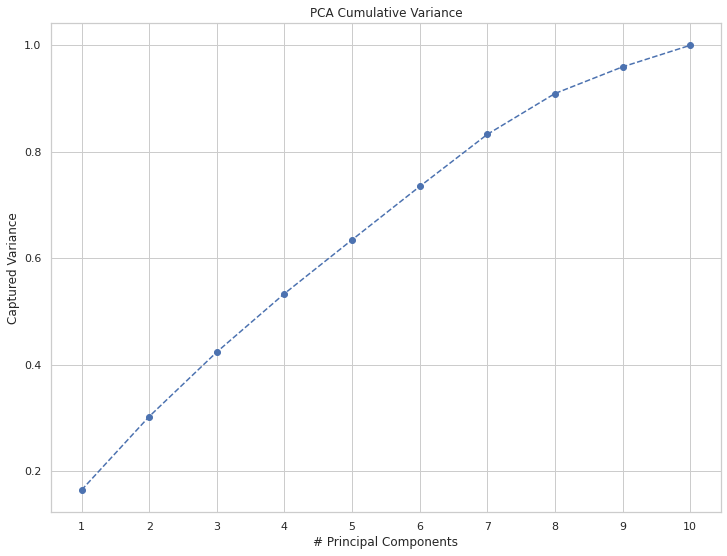

In [79]:
evr = pca.explained_variance_ratio_
n_comp = pca.components_

plt.figure(figsize=(12,9))
plt.plot(range(1, 10+1), pca.explained_variance_ratio_.cumsum(), marker='o', linestyle='--')
plt.title('PCA Cumulative Variance')
plt.xticks(range(1,11))
plt.xlabel('# Principal Components')
plt.ylabel('Captured Variance')
plt.show()

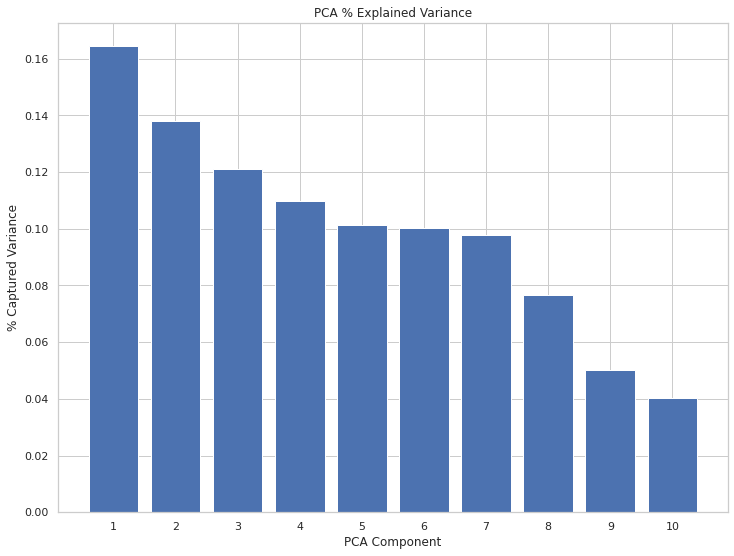

In [80]:
plt.figure(figsize=(12,9))
n = pca.n_components_
grid = np.arange(1, n + 1)

evr = pca.explained_variance_ratio_
plt.bar(grid, evr)
plt.title('PCA % Explained Variance')
plt.xticks(range(1,11))
plt.xlabel('PCA Component')
plt.ylabel('% Captured Variance')
plt.show()

Now using these PCA components, we can analyze what kind of features it found in the data.

For instance, we can get the indices of the first component and look at the differences in highly regarded variables and their relationships with the rest of the variables.

For PC1, it regards category and sub-category highly, while discount lower than the rest of the variables.

In [81]:
idx = X_pca['PC1'].sort_values(ascending=False).index
cols = model_df_ra.columns.tolist()
model_df_ra.loc[idx, cols]

,Ship Mode,Segment,City,State,Region,Category,Sub-Category,Quantity,Discount,Profit,Sales
6826,Standard Class,Corporate,Lafayette,Indiana,Central,Technology,Copiers,5,0.0,8399.9760,17499.950
8153,First Class,Consumer,Seattle,Washington,West,Technology,Copiers,4,0.0,6719.9808,13999.960
4190,Standard Class,Consumer,Newark,Delaware,East,Technology,Copiers,3,0.0,5039.9856,10499.970
2623,First Class,Home Office,New York City,New York,East,Technology,Copiers,4,0.2,3919.9888,11199.968
7666,Standard Class,Home Office,Providence,Rhode Island,East,Technology,Copiers,9,0.0,2591.9568,5399.910
...,...,...,...,...,...,...,...,...,...,...,...
1369,Standard Class,Consumer,Colorado Springs,Colorado,West,Furniture,Bookcases,7,0.7,-786.7440,590.058
9639,Second Class,Consumer,Concord,North Carolina,South,Furniture,Tables,13,0.4,-1862.3124,4297.644
27,Standard Class,Consumer,Philadelphia,Pennsylvania,East,Furniture,Bookcases,7,0.5,-1665.0522,3083.430
9774,Standard Class,Consumer,San Antonio,Texas,Central,Office Supplies,Binders,8,0.8,-3701.8928,2177.584


Based on this alone, we can see the differences this first Principal Component pointed out. 

In fact, it actually goes with what we found in our data analysis somewhat! PC1 highlights copiers (those items yielded positive profit without virtually any negative loss) and at the bottom we see the bookcases that yielded a lot of negative profit. In addition, we can see the discount rate is also much higher for those bookcases. It may be why the profits/sales figures are as low as they were.

* We can also note differences in ship mode, segment, and where these items were purchased.

* Since we're predicting Sales, we can also see how much higher the sales are for copiers vs. the bookcases.

It looks like PCA saw exactly what we found. 

We also saw from the MI scores, that sub-category is highly regarded in its importance towards profit. This is backed by what we saw in our analysis. Some sub-categories were proftably stable, while others had virtually all negative profit records.

In [82]:
X_pre = pd.DataFrame(X, columns=X.columns.tolist()) #using the scaled X instead of the original X
X_pcas = X_pre.join(X_pca) #So that everything is on the same scale.
X_pcas.head() #however...guide joined the original X. what to do :'(

,Ship Mode,Segment,City,State,Region,Category,Sub-Category,Quantity,Discount,Profit,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10
0,Second Class,Consumer,Henderson,Kentucky,South,Furniture,Bookcases,2,0.00,41.9136,-2.436603,-1.017855,1.919374,0.565551,-0.244432,-1.591685,-0.991881,-0.151391,0.358278,-0.311602
1,Second Class,Consumer,Henderson,Kentucky,South,Furniture,Chairs,3,0.00,219.5820,-2.047423,-0.926384,2.292177,0.962610,-0.020761,-1.384218,-0.691786,0.270260,0.399621,-0.114841
2,Second Class,Corporate,Los Angeles,California,West,Office Supplies,Labels,2,0.00,6.8714,-0.957130,-0.811834,0.996173,0.582354,-0.021026,-0.635593,-1.792383,-0.291542,-0.190941,-1.001700
3,Standard Class,Consumer,Fort Lauderdale,Florida,South,Furniture,Tables,5,0.45,-383.0310,-2.743904,-1.938746,-0.080589,-0.697688,0.685768,-0.286462,0.639638,-0.531075,0.876039,0.160859
4,Standard Class,Consumer,Fort Lauderdale,Florida,South,Office Supplies,Storage,2,0.20,2.5164,-0.852313,-1.626001,0.747762,-0.140630,-0.697279,-0.876101,-0.076155,0.069706,0.658614,-0.701659


I did attempt to run some basic models (OLS and sklearn Linear Regression), however I couldn't get a practical model out of this data that had an acceptable R2 value. If you're able to generate a functional model with this dataset I would love to see it!

## Closing Remarks / Recommendations

In conclusion, I can at least point out some insights and conclusions from this analysis.

* Some of the states that had higher sales, had net negative profits overall. Across the board, Technology profits seemed to be doing better than Office Supplies and Furniture.

* In the states with the top profits, phones, binders, and storage were very popular. 

* Despite some of the states with higher sales netting negative profits, eastern and western states collectively were the best two regions driviing profits.

* Some sub-categories, namely machines, tables, and bookcases, were the main drivers of loss in profits, as almost all records of these products netted negative profits.

* Furnishings and appliances were netting negative profits in the eastern states.

* After performing Principal Component Analysis, we obtained a glimpse of what products drove higher sales: Technology products are what is driving the positive profits (namely copiers), while some furniture and office supplies products were dragging profits down. These records of negative profits also had higher discounts.

This brings us to the conclusion of this notebook. I hope it was insightful and if you have any feedback at all I would appreicate your provision!